In [1]:
LIBRARY='rdkit'

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm import tqdm
import pickle
from IPython.display import clear_output

In [36]:
SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

mpl.rcParams['axes.grid'] = True
mpl.rcParams['figure.figsize']=(16,9)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

In [7]:
def getDataFromFile(file_name):
    try:
        with open(file_name, 'rb') as file:
            print('File Found')
            return pickle.load(file)
    except FileNotFoundError:
        print('File Not Found, performe the whole process...')
        return None

# Optimized Models Vs. Error (Stacked Histogram wrt Feature Type)

In [73]:
# MODEL_OPT_DF_2d+3d+fp_rdkit.pkl
file_name='MODEL_PERFORMANCE_DF_2d+3d+fp_rdkit.pkl'
df1=getDataFromFile(file_name)
df1['feat_set']='2d+3d+fp_'+LIBRARY
file_name='MODEL_PERFORMANCE_DF_2d+3d_rdkit.pkl'
df2=getDataFromFile(file_name)
df2['feat_set']='2d+3d_'+LIBRARY
file_name='MODEL_PERFORMANCE_DF_2d_rdkit.pkl'
df3=getDataFromFile(file_name)
df3['feat_set']='2d_'+LIBRARY
file_name='MODEL_PERFORMANCE_DF_3d_rdkit.pkl'
df4=getDataFromFile(file_name)
df4['feat_set']='3d_'+LIBRARY
df=pd.concat([df1,df2,df3,df4])
df

File Found
File Found
File Found
File Found


,model_name,opt_model,opt_params,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,test_r2,test_mse,test_mae,feat_set
0,linear_reg,"LinearRegression(normalize=True, positive=True)","{'fit_intercept': True, 'normalize': True, 'po...",-34.832723,14.202987,0.489466,0.838745,0.068351,0.202750,2d+3d+fp_rdkit
1,ridge,"Ridge(alpha=1, max_iter=500, solver='saga')","{'alpha': 1, 'max_iter': 500, 'solver': 'saga'...",0.988107,0.004508,0.046330,0.977318,0.009614,0.057180,2d+3d+fp_rdkit
2,lasso,"Lasso(alpha=0.01, max_iter=200)","{'alpha': 0.01, 'max_iter': 200, 'positive': F...",0.984050,0.005869,0.059684,0.974728,0.010712,0.071932,2d+3d+fp_rdkit
3,elastic_net,"ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=500)","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...",0.922607,0.031899,0.155291,0.927452,0.030751,0.149757,2d+3d+fp_rdkit
4,lasso_lars,"LassoLars(alpha=0.01, max_iter=100)","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...",0.934235,0.026687,0.132405,0.946059,0.022864,0.124048,2d+3d+fp_rdkit
...,...,...,...,...,...,...,...,...,...,...
15,random_forest,"(DecisionTreeRegressor(max_features='auto', ra...","{'bootstrap': True, 'n_estimators': 100, 'oob_...",0.801997,0.084862,0.184071,-6.337025,3.109929,1.642607,3d_rdkit
16,ada_boost,"(DecisionTreeRegressor(max_depth=3, random_sta...","{'learning_rate': 1.5, 'loss': 'square', 'n_es...",0.825432,0.073746,0.182992,-4.235996,2.219370,1.358405,3d_rdkit
17,gradient_boosting_reg,([DecisionTreeRegressor(criterion='friedman_ms...,"{'max_depth': 3, 'n_estimators': 500, 'tol': 0...",0.805474,0.079643,0.195300,-7.624266,3.655549,1.794287,3d_rdkit
18,neural_network,"MLPRegressor(hidden_layer_sizes=(50, 30, 20), ...","{'activation': 'relu', 'early_stopping': False...",0.710779,0.125364,0.264608,-16767.812973,7107.760287,75.955439,3d_rdkit


(0.0, 0.2)

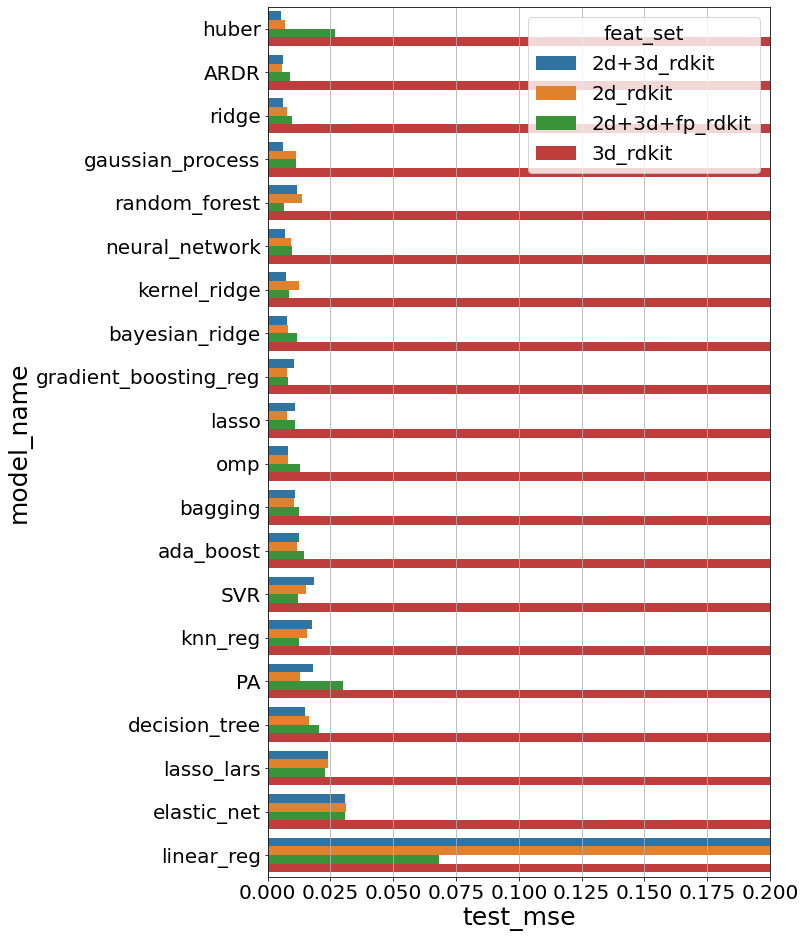

In [42]:
# plt.barh(df['model_name'],df['test_mse'])
df=df.sort_values(by='test_mse')
plt.figure(figsize=(9,16))
sns.barplot(x='test_mse', y='model_name',  data=df, hue='feat_set')
plt.xlim(0,0.2)

# Best Model Error Vs. Num Features

In [85]:
# BEST_MODEL_VS_NUM_FETUREs_2d+3d+fp_rdkit.pkl
file_name=f'BEST_MODEL_VS_NUM_FETURES_2d+3d+fp_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df=df.set_index('num_feat')
df

File Found


,feat_set,model_name,test_r2,test_mse,test_mae
num_feat,,,,,
1,fp+2d+3d_rdkit,knn_reg,0.512375,0.206689,0.260268
2,fp+2d+3d_rdkit,knn_reg,0.857394,0.060446,0.160892
3,fp+2d+3d_rdkit,knn_reg,0.863277,0.057952,0.160674
4,fp+2d+3d_rdkit,knn_reg,0.875495,0.052774,0.164051
5,fp+2d+3d_rdkit,knn_reg,0.920836,0.033555,0.116513
...,...,...,...,...,...
2629,fp+2d+3d_rdkit,knn_reg,0.984438,0.006596,0.058252
2630,fp+2d+3d_rdkit,knn_reg,0.984590,0.006532,0.057155
2631,fp+2d+3d_rdkit,knn_reg,0.984394,0.006615,0.058140


(0.0, 100.0)

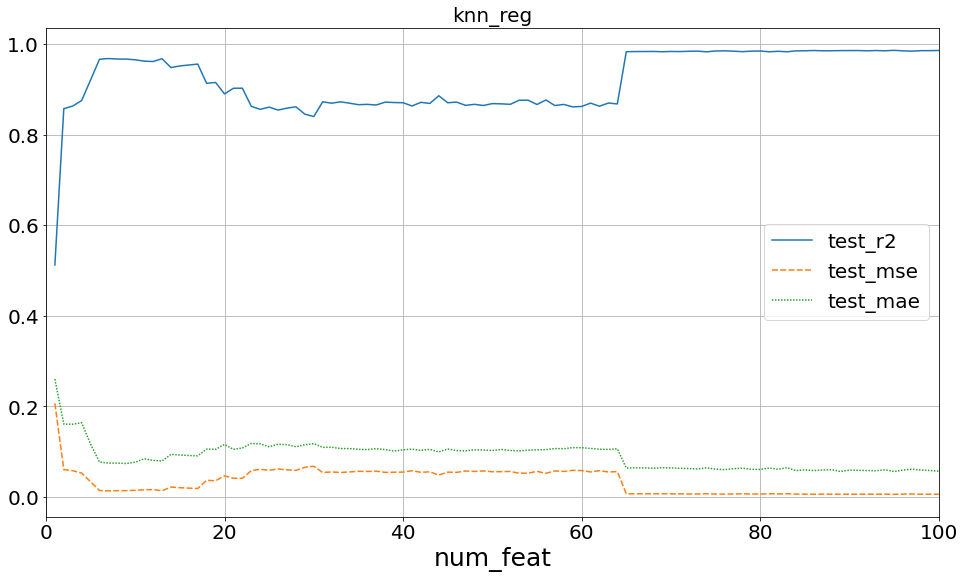

In [87]:
sns.lineplot(data=df[['test_r2','test_mse','test_mae']])
plt.title(df['model_name'].values[0])
plt.xlim(0,100)

left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

# Feature Importance Plots

In [75]:
# FETURE_IMPORTANCE_DF_2d+3d+fp_{LIBRARY}.pkl
file_name=f'FETURE_IMPORTANCE_DF_2d+3d+fp_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df

File Found


,feat_name,random_forest_score,ada_boost_score,gradient_boosting_reg_score,kbest_selector_score,mean_permutation_imp_score
0,MaxEStateIndex_2d_rdkit,2.426896e-03,0.003081,0.002324,1.128163,1.229062e-03
1,MinEStateIndex_2d_rdkit,1.809864e-04,0.000000,0.000017,0.871754,1.552445e-04
2,MaxAbsEStateIndex_2d_rdkit,2.530465e-03,0.004756,0.003027,1.128979,1.043425e-03
3,MinAbsEStateIndex_2d_rdkit,3.826138e-04,0.001502,0.000035,0.423935,5.609654e-04
4,qed_2d_rdkit,4.080384e-05,0.000000,0.000001,1.091460,3.379208e-04
...,...,...,...,...,...,...
2629,rdkit_fp_2042,8.740769e-07,0.000000,0.000000,0.243585,3.400861e-05
2630,rdkit_fp_2043,0.000000e+00,0.000000,0.000000,0.000000,-3.658335e-19
2631,rdkit_fp_2044,4.369780e-07,0.000000,0.000000,0.295205,3.076667e-05
2632,rdkit_fp_2046,1.735681e-05,0.000000,0.000000,0.360974,3.999575e-05


File Found
(2634, 6)


<AxesSubplot:xlabel='random_forest_score', ylabel='feat_name'>

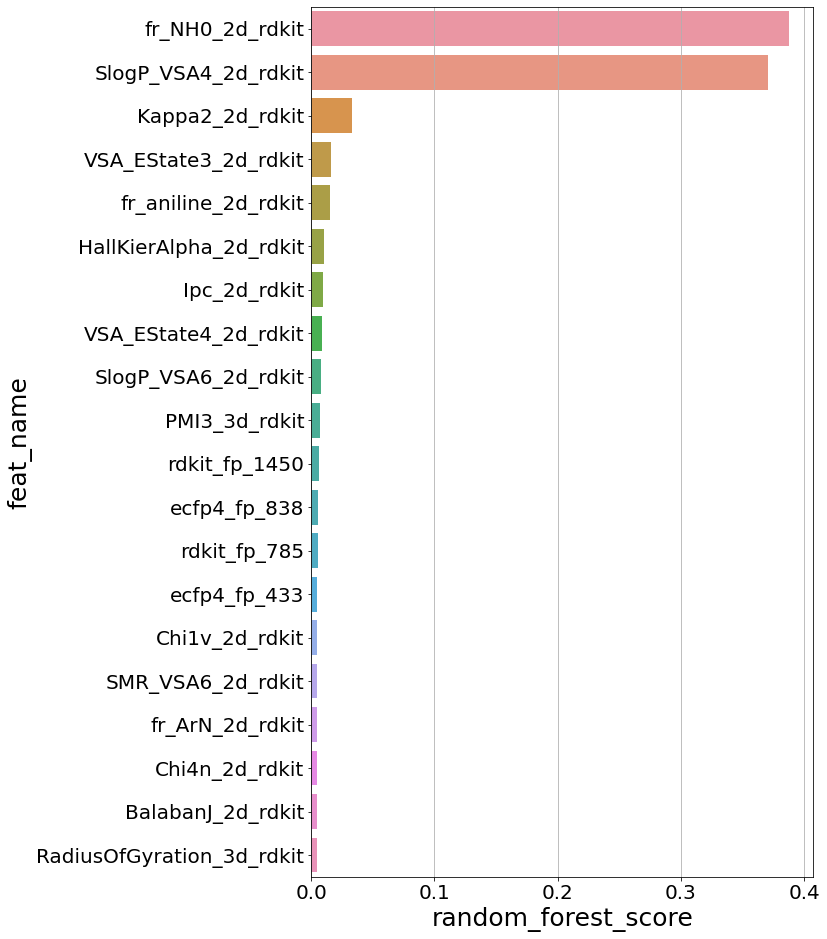

In [72]:
ntop=20
df=df.sort_values(by='random_forest_score',ascending=False)
plt.figure(figsize=(9,16))
sns.barplot(x='random_forest_score',y='feat_name',data=df[:ntop])

# Model Performance on Top n=20 Features

In [82]:
# TOP_FEAT_MODEL_PERFORMANCE_DATA_DF_rdkit.pkl
file_name=f'TOP_FEAT_MODEL_PERFORMANCE_DATA_DF_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df

File Found


,model_name,opt_model,opt_params,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,test_r2,test_mse,test_mae
0,linear_reg,"LinearRegression(normalize=True, positive=True)","{'fit_intercept': True, 'normalize': True, 'po...",0.712830,0.121683,0.276570,0.748640,0.106544,0.244882
1,ridge,"Ridge(alpha=0.5, max_iter=500, solver='sparse_...","{'alpha': 0.5, 'max_iter': 500, 'solver': 'spa...",0.721198,0.114029,0.268917,0.755759,0.103526,0.231901
2,lasso,"Lasso(alpha=0.01, tol=1e-07)","{'alpha': 0.01, 'max_iter': 1000, 'positive': ...",0.698274,0.127033,0.285227,0.733241,0.113071,0.254505
3,elastic_net,"ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...",0.569582,0.179177,0.362399,0.620946,0.160669,0.332299
4,lasso_lars,"LassoLars(alpha=0.01, max_iter=100, positive=T...","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...",0.612961,0.160159,0.338840,0.656023,0.145801,0.315293
5,omp,OrthogonalMatchingPursuit(),{},0.491653,0.211011,0.380081,0.604983,0.167435,0.339774
6,bayesian_ridge,"BayesianRidge(alpha_1=1e-05, alpha_2=1e-07, la...","{'alpha_1': 1e-05, 'alpha_2': 1e-07, 'lambda_1...",0.721523,0.113977,0.268375,0.757736,0.102688,0.230401
7,ARDR,"ARDRegression(alpha_1=1e-07, lambda_1=1e-07, n...","{'alpha_1': 1e-07, 'lambda_1': 1e-07, 'n_iter'...",0.727566,0.112641,0.264954,0.754249,0.104166,0.234638
8,PA,"PassiveAggressiveRegressor(C=0.9, max_iter=500...","{'C': 0.9, 'max_iter': 500, 'tol': 1e-08}",-0.274996,0.554189,0.533779,0.637878,0.153492,0.272665
9,huber,"HuberRegressor(alpha=1e-05, epsilon=1, max_ite...","{'alpha': 1e-05, 'epsilon': 1, 'max_iter': 100...",0.732263,0.109401,0.256021,0.760612,0.101469,0.228995


<AxesSubplot:xlabel='test_mse', ylabel='model_name'>

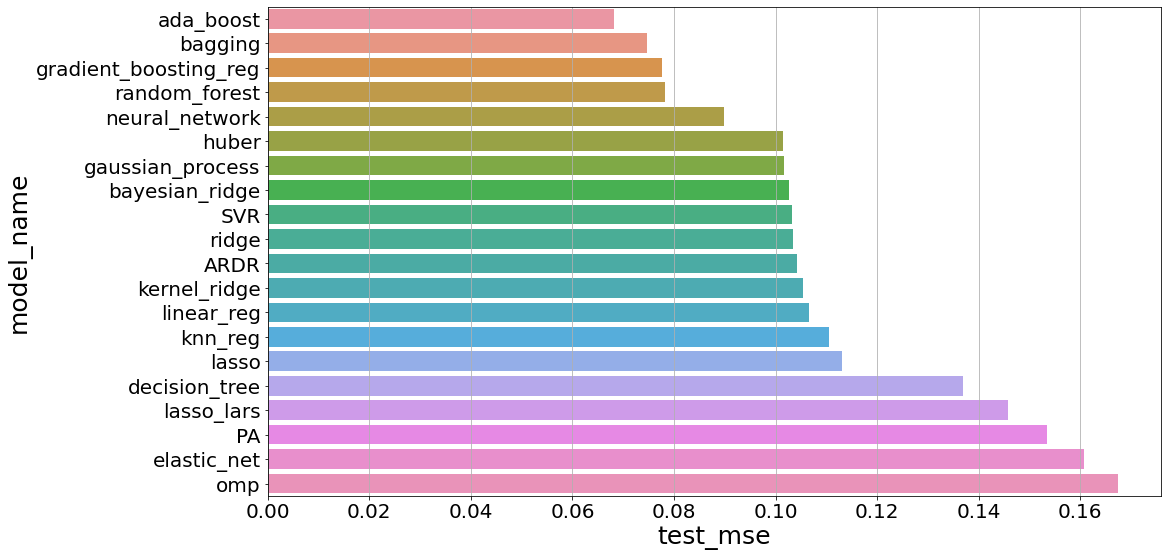

In [83]:
df=df.sort_values(by='test_mse')
sns.barplot(x='test_mse',y='model_name',data=df)

# Model Error per Class of Compound

In [105]:
# BEST_MODEL_ERROR_PER_COMPOUND_TRAIN_rdkit.pkl
file_name=f'BEST_MODEL_MEAN_ERROR_PER_COMPOUND_TRAIN_{LIBRARY}.pkl'
df1=getDataFromFile(file_name)
df1['label']='train'
file_name=f'BEST_MODEL_MEAN_ERROR_PER_COMPOUND_TEST_{LIBRARY}.pkl'
df2=getDataFromFile(file_name)
df2['label']='test'
df=pd.concat([df1,df2])
df

File Found
File Found


,true_y,pred_y,abs_error,%abs_error,model_name,feat_set,label
FG_name,,,,,,,
CH2=CH,-1.720000,-1.717333,0.002667,0.155039,random_forest,2d+3d+fp_rdkit,train
S(CH3)2,-1.740000,-1.732333,0.007667,0.440613,random_forest,2d+3d+fp_rdkit,train
COCH3,-1.550000,-1.558000,0.008000,0.516129,random_forest,2d+3d+fp_rdkit,train
-,-1.740000,-1.730933,0.009067,0.521073,random_forest,2d+3d+fp_rdkit,train
CHO,-1.505000,-1.511133,0.014467,0.959897,random_forest,2d+3d+fp_rdkit,train
OH,-1.806000,-1.805047,0.015533,0.864116,random_forest,2d+3d+fp_rdkit,train
F,-1.680000,-1.662200,0.017800,1.059524,random_forest,2d+3d+fp_rdkit,train
NH2,-2.136970,-2.130251,0.019059,0.873752,random_forest,2d+3d+fp_rdkit,train
CONH2,-1.575000,-1.576833,0.020233,1.290294,random_forest,2d+3d+fp_rdkit,train


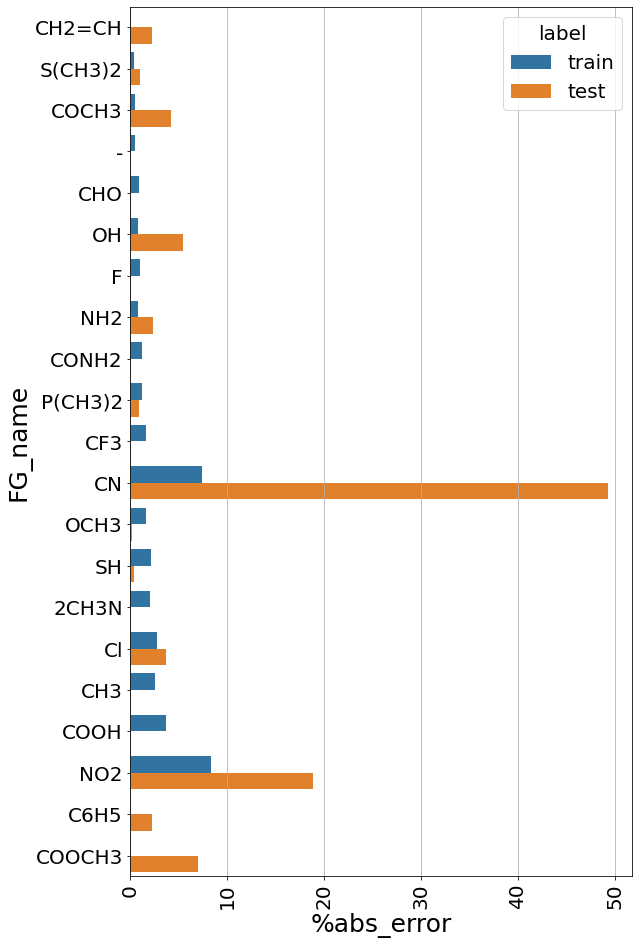

In [106]:
df=df.reset_index()
plt.figure(figsize=(9,16))
sns.barplot(y='FG_name',x='%abs_error',data=df, hue='label')
plt.xticks(rotation=90);